# Default rate analysis by industrial sector (2023) - Matteo Tragni

First question: Compute and plot the distribution (by principal balance outstanding) of the portfolio by the first level of NACE code for the two reporting date (data_cut_off_date) include active and performing loans only.

In [1]:
# I will be using the variable 'current principal balance' as the principal balance outstanding;
# Regarding the NACE code, I have added a column called 'nace_first_level_code' (column M) which takes only the first letter from the original code (LEFT function in excel).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [106]:
df = pd.read_excel('C:/Users/tragn/OneDrive/Desktop/test.xlsx', sheet_name= 'DATABASE SME ')
df.head(30)
df.dtypes

,edcode,data_cut_off_date,original_underlying_exposure_identifier,format,spv_country,deal_vintage,unique_identifier,original_obligor_identifier,redemption_date,geographic_region_obligor,...,original_lender_establishment_country,original_lender_legal_entity_identifier,origination_channel,originator_establishment_country,originator_legal_entity,payment_in_kind,recourse,revised_interest_rate_tenor,securitised_receivables,special_scheme
0,SPV000165100820199,2023-03-31,007-610-0111960,ESMA,IT,2019,549300B0FLNFTFYQDJ30N201901,485651,NaT,ITH41,...,IT,549300B0FLNFTFYQDJ30,BRAN,IT,549300B0FLNFTFYQDJ30,False,1.0,NaN,PRIN,NaN
1,SPV000165100820199,2023-03-31,015-645-0109207,ESMA,IT,2019,549300B0FLNFTFYQDJ30N201901,488057,NaT,ITH42,...,IT,549300B0FLNFTFYQDJ30,BRAN,IT,549300B0FLNFTFYQDJ30,False,1.0,NaN,PRIN,NaN
2,SPV000165100820199,2023-03-31,033-620-0090734,ESMA,IT,2019,549300B0FLNFTFYQDJ30N201901,414379,NaT,ITH42,...,IT,549300B0FLNFTFYQDJ30,BRAN,IT,549300B0FLNFTFYQDJ30,False,1.0,NaN,PRIN,NaN
3,SPV000165100820199,2023-03-31,034-645-0058270,ESMA,IT,2019,549300B0FLNFTFYQDJ30N201901,407118,NaT,ITH42,...,IT,549300B0FLNFTFYQDJ30,BRAN,IT,549300B0FLNFTFYQDJ30,False,1.0,NaN,PRIN,NaN
4,SPV000165100820199,2023-03-31,040-620-0070585,ESMA,IT,2019,549300B0FLNFTFYQDJ30N201901,81326,NaT,ITH35,...,IT,549300B0FLNFTFYQDJ30,BRAN,IT,549300B0FLNFTFYQDJ30,False,1.0,NaN,PRIN,NaN
5,SPV000165100820199,2023-03-31,067-620-0070171,ESMA,IT,2019,549300B0FLNFTFYQDJ30N201901,422216,NaT,ITH34,...,IT,549300B0FLNFTFYQDJ30,BRAN,IT,549300B0FLNFTFYQDJ30,False,1.0,NaN,PRIN,NaN
6,SPV000165100820199,2023-03-31,101-620-0010064,ESMA,IT,2019,549300B0FLNFTFYQDJ30N201901,39474,NaT,ITH42,...,IT,549300B0FLNFTFYQDJ30,BRAN,IT,549300B0FLNFTFYQDJ30,False,1.0,NaN,PRIN,NaN
7,SPV000165100820199,2023-03-31,025-620-0091272,ESMA,IT,2019,549300B0FLNFTFYQDJ30N201901,286200,NaT,ITH42,...,IT,549300B0FLNFTFYQDJ30,BRAN,IT,549300B0FLNFTFYQDJ30,False,1.0,NaN,PRIN,NaN
8,SPV000165100820199,2023-03-31,028-620-0091266,ESMA,IT,2019,549300B0FLNFTFYQDJ30N201901,269229,2023-02-28,ITH42,...,NaN,549300B0FLNFTFYQDJ30,NaN,IT,549300B0FLNFTFYQDJ30,False,NaN,NaN,PRIN,NaN
9,SPV000165100820199,2023-03-31,031-620-0107408,ESMA,IT,2019,549300B0FLNFTFYQDJ30N201901,481708,NaT,ITH42,...,IT,549300B0FLNFTFYQDJ30,BRAN,IT,549300B0FLNFTFYQDJ30,False,1.0,NaN,PRIN,NaN


In [6]:
df.columns
# For the first question, I will filter my data using only the useful columns

In [8]:
df_1 = df[['data_cut_off_date', 'nace_first_level_code', 'current_principal_balance', 'default_date']]

In [10]:
#Since the question specifically requires only to include active and performing loans, I will delete those rows which show a value in the default date
active_performing_loans = df_1[df_1['default_date'].isnull()]

# I will now group the data by NACE code and cut-off date,and the values will be the sum of the 'current principal balance' variable.
# I will then reset the index which is automatically created when running this type of query
grouped_data = active_performing_loans.groupby(['nace_first_level_code', 'data_cut_off_date'])['current_principal_balance'].sum().reset_index()
# I will now create a pivot table out of the last output
pivot_table = grouped_data.pivot(index='nace_first_level_code', columns='data_cut_off_date', values='current_principal_balance')
pivot_table

data_cut_off_date,2022-12-31,2023-03-31
nace_first_level_code,,
A,37706574.65,36419462.13
B,52284.30,44197.44
C,15368488.14,12669471.13
D,695630.19,663149.87
E,889560.50,628890.46
F,15623484.54,14842437.16
G,17195812.06,16157806.66
H,4646980.10,1729244.79
I,41090922.43,39170048.43


In [11]:
# Now we have the principal balance outstanding amount divided by the two levels of analysis: the two cut-off dates, and all the NACE codes

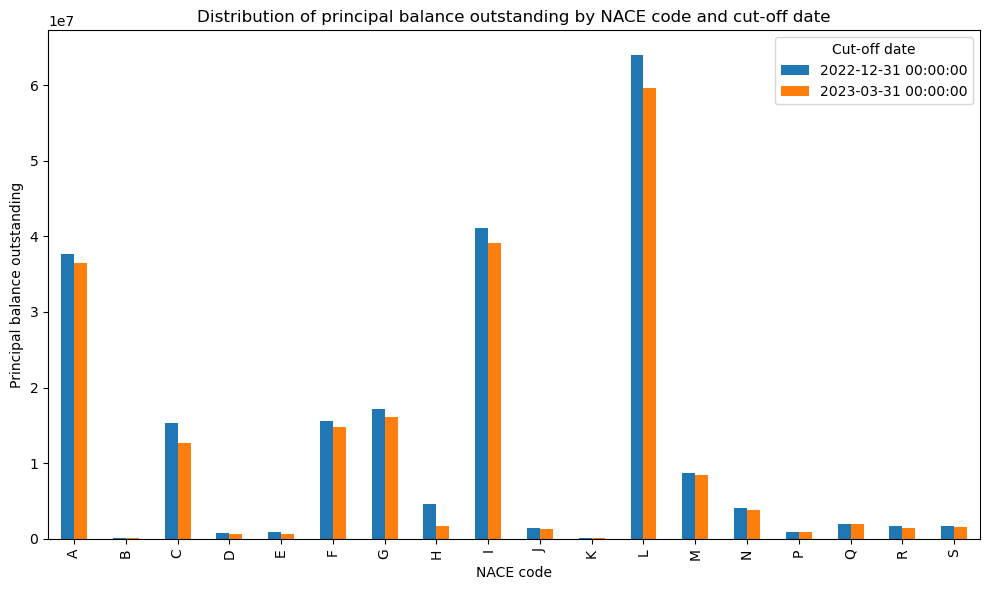

In [12]:
# We can now visualize the distribution
plt.figure(figsize=(10, 6))
pivot_table.plot(kind='bar', ax=plt.gca())
plt.xlabel('NACE code')
plt.ylabel('Principal balance outstanding')
plt.title('Distribution of principal balance outstanding by NACE code and cut-off date')
plt.legend(title='Cut-off date')
plt.tight_layout()
plt.show()

The amount of PBO is represented in tens of millions on the Y axis 

Taking a look at the distribution, we can point out some aspects:
For any industrial sector, the PBO amount is always higher at the first cut-off date. There could be several reason for this:
a) Perhaps, it simply indicates that a significant number of loans were issued shortly before or during the first cut-off date, with respect to the second date;
b) The overall performance of loans in the dataset may impact the principal balance.
Higher-performing loans might have lower principal balances at subsequent cut-off dates due to timely repayments and lower outstanding debt.
This would represent a good indicator for the performance of the portfolio;

However, it might be more interesting to analyse the results according to the different NACE codes:
The top 3 industrial sectors for amount of PBO are : 
L => Real estate activities: I was expecting to find it at the top positions. When it comes to securitization, MBS and all            types of assets related to real estate are always the main component of portofolios owned by SPVs.
     Financial institutions are usually pretty confident about the long -term stability and profitability of this sector 
I => Accommodation and food service activities: I believe that one potential reason for the PBO amount to be this high in            this sector is that significant capital requirements are needed to sustain operations and expand the business;
A => Agriculture, forestry and fishing: we could assume that positive, long-term expectations also apply to this sector;         besides, also here we usually talk about big capital requirements.

In [23]:
# According to the line of thinking according to which we will find higher amounts for those sectors which need much more capital to carry on operations,
# we could check this the other way round:
min(pivot_table['2022-12-31'])
# The lowest values in PBO amount are represented by The sector K: Financial and insurance activities. I think this makes sense since we are talking
# about activities which deal with extremely liquid assets. 

33686.6

Second question: Calculate and plot the default rate by first level of NACE code and spv_country (default rate is the measure of default calculated on the outstanding amount in default).

In [33]:
df_2 = df[['spv_country', 'nace_first_level_code', 'current_principal_balance',
           'default_date']]
grouped_data_2 = df_2.groupby(['spv_country', 'nace_first_level_code'])['current_principal_balance'].sum().reset_index()
pivot_table_2 = grouped_data_2.pivot(index='nace_first_level_code', columns='spv_country', values='current_principal_balance')
pivot_table_2

In [25]:
# I will now create the variable containing the defaulted loans excluding all the empty rows in the 'default_date' column,
# and I will proceed computing the outstanding amount in deafult for each NACE code and SPV (there is only one: IT)
defaulted_loans = df_2[df_2['default_date'].notna()]
outstanding_amount_in_default = defaulted_loans.groupby(['nace_first_level_code', 'spv_country'])['current_principal_balance'].sum()
outstanding_amount_in_default

nace_first_level_code  spv_country
A                      IT              6701746.56
C                      IT              2111409.14
F                      IT              2458867.24
G                      IT              1031983.20
H                      IT                 2346.80
I                      IT              8338194.74
L                      IT             17997184.55
M                      IT              2076622.40
N                      IT               316619.61
P                      IT               144092.28
R                      IT                 2740.07
Name: current_principal_balance, dtype: float64

In [41]:
# in order to compute the default rate, I will calculate the total amount of principal balance outstanding, and then divide the outstanding amount in default by it in order to get the ratio
total_outstanding_amount = df_2.groupby(['nace_first_level_code', 'spv_country'])['current_principal_balance'].sum()
total_outstanding_amount

nace_first_level_code  spv_country
A                      IT             8.082778e+07
B                      IT             9.648174e+04
C                      IT             3.014937e+07
D                      IT             1.358780e+06
E                      IT             1.518451e+06
F                      IT             3.292479e+07
G                      IT             3.438560e+07
H                      IT             6.378572e+06
I                      IT             8.859917e+07
J                      IT             2.736789e+06
K                      IT             6.534826e+04
L                      IT             1.417272e+08
M                      IT             1.909327e+07
N                      IT             8.239169e+06
P                      IT             1.984585e+06
Q                      IT             3.927746e+06
R                      IT             3.046051e+06
S                      IT             3.198851e+06
Name: current_principal_balance, dtype: float64

In [49]:
# Default rate
default_rate = (outstanding_amount_in_default / total_outstanding_amount)*100
default_rate

nace_first_level_code  spv_country
A                      IT              8.291390
B                      IT                   NaN
C                      IT              7.003162
D                      IT                   NaN
E                      IT                   NaN
F                      IT              7.468134
G                      IT              3.001207
H                      IT              0.036792
I                      IT              9.411144
J                      IT                   NaN
K                      IT                   NaN
L                      IT             12.698472
M                      IT             10.876203
N                      IT              3.842859
P                      IT              7.260575
Q                      IT                   NaN
R                      IT              0.089955
S                      IT                   NaN
Name: current_principal_balance, dtype: float64

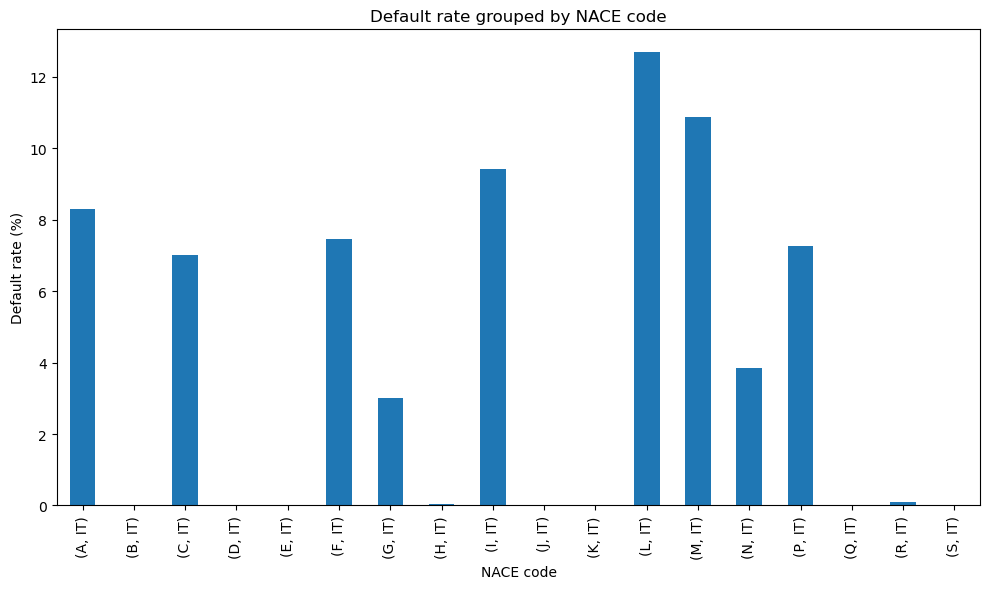

In [45]:
plt.figure(figsize=(10, 6))
default_rate.plot(kind='bar', ax=plt.gca())
plt.xlabel('NACE code')
plt.ylabel('Default rate (%)')
plt.title('Default rate grouped by NACE code')
plt.tight_layout()
plt.show()

Results
The top 3 industries with the highest default rate are:
L => Real Estate (12.7%)
M => Professional, scientific and technical activities (10.9%)
I =>Accomodation and food service activities (9.4%)
I was expecting to find Real Estate here: if we take a look at the second cut-off date of our dataset, we are at March 2023; at the beginning of the year, the ECB raised the interest rates, and the interests on mortgages skyrocketed - this means less mortgages and higher risk of default, meaning that more people will be eager not to repay their loans. This is the main reason, in my opinion, why we see the highest default rate in the Real Estate sector.

Among the various reasons which affect the other analyzed industries, I thought it might be somehow also related to cash flow instability: this type of professional services can be influenced by so many circumstances that could harm a positive cashflow. 

In [69]:
data = df.groupby('nace_first_level_code')['free_cashflow'].mean()
data

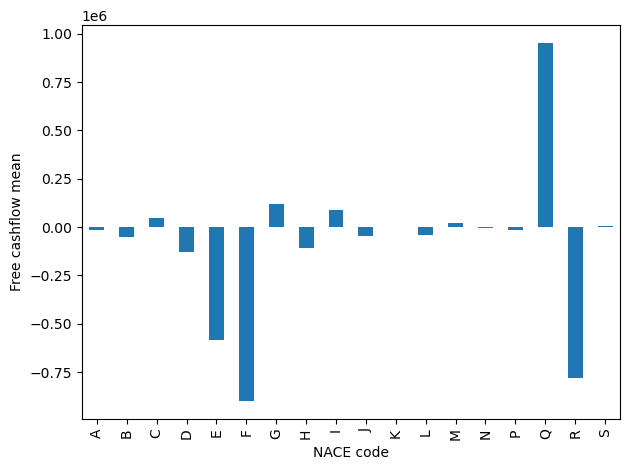

In [71]:
data.plot(kind='bar', ax=plt.gca())
plt.xlabel('NACE code')
plt.ylabel('Free cashflow mean')
plt.tight_layout()
plt.show()

I computed the average cash flow for each NACE sector; however, it seems like there is nothing relevant on this side. The reasons for this sector to have such a high default rate can be due to tens of business/economics/specifi risk-related matters.

Third question: Calculate and plot the WALA, WAM and WAC (Weighted average loan age, Weighted average Maturity, Weighted average Coupon) of the portfolio for the two reporting date. For the coupon you can use the field current_interest_rate.

In [108]:
# WALA = ∑(Remaining Time to Maturity * Outstanding Principal Balance) / Total Outstanding Principal Balance
# I calculate the age of the loan in days:
df['age_of_the_loan'] = (df['maturity_date'] -  df['origination_date']).dt.days
# I calcluate the weighted time by multiplying the age of the loan by the principal balance:
df['weighted_time'] = df['age_of_the_loan']*df['current_principal_balance']
# I calculate the aggregate values:
total_weighted_time = df['weighted_time'].sum()
total_principal_balance = df['current_principal_balance'].sum()
# I calculate the WALA:
wala = total_weighted_time / total_principal_balance
wala

6473.460901495462

WALA = 6473.46
This means that the average time it will take for the loans in this pool to be mature and be fully repaid is approximately 17.7 years. Whether this value can be considered as good or not by the investors solely depends on their strategy: from a long-term perspective, this pool might be desirable for those seeking more stable and predictable income over an extended period. It would be useful to compare this WALA with some benchmarks in order to properly assess it. 

In [115]:
# WAM = ∑ (Outstanding Principal Balance * Time to Maturity) / ∑ Outstanding Principal Balance
# The payments of the loans inside our pool are scheduled in the following way:
count_MNTH = df[df['scheduled_principal_payment_frequency'] == 'MNTH']['scheduled_principal_payment_frequency'].value_counts()
count_QUTR = df[df['scheduled_principal_payment_frequency'] == 'QUTR']['scheduled_principal_payment_frequency'].value_counts()
count_SEMI = df[df['scheduled_principal_payment_frequency'] == 'SEMI']['scheduled_principal_payment_frequency'].value_counts()
# MNTH = monthly;
# QUTR = quarterly;
# SEMI = semi-annual
count_MNTH
count_QUTR
count_SEMI
total = 2430 + 237 + 311
mnth = (count_MNTH / total)* 100
qutr = (count_QUTR / total)* 100
semi = (count_SEMI / total)* 100
mnth, qutr, semi

(MNTH    81.598388
 Name: scheduled_principal_payment_frequency, dtype: float64,
 QUTR    7.958361
 Name: scheduled_principal_payment_frequency, dtype: float64,
 SEMI    10.443251
 Name: scheduled_principal_payment_frequency, dtype: float64)

monthly payments represent the great majority with 81.6%; quarterly and semi-annual are respectively 7.96% and 10.44%

In [121]:
payment_frequency_to_time = {
    'MNTH': 1/12,
    'QUTR': 1/4,
    'SEMI': 1/2 
}
df.dropna(subset=['maturity_date', 'origination_date'], inplace=True)

df['time_to_maturity'] = df.apply(lambda row: (row['maturity_date'] - row['origination_date']).days/365.25 * payment_frequency_to_time[row['scheduled_principal_payment_frequency']], axis=1)
df['weighted_time'] = df['time_to_maturity'] * df['current_principal_balance']
total_weighted_time = df['weighted_time'].sum()
total_principal_balance = df['current_principal_balance'].sum()
wam = total_weighted_time / total_principal_balance
wam                          

3.336901280661723

WAM = 3.33
This means that, on average, the loans in the portfolio have an expected remaining time to maturity of approximately 3.33 years. Apparently, our portfolio is mainly made of short-remaining maturities. 
My interpretation, taking into account both results of WALA and WAM, is that this pool of loans constitute a good solution for investors seeking for frequent, stable cash flows on a long-term horizon.

In [1]:
# WAC = Σ (Weighted Interest for each loan) / Total Outstanding Principal Balance
df['weighted_interest'] = df['current_interest_rate']*df['current_principal_balance']
wac = df['weighted_interest'].sum() / total_principal_balance
wac

NameError: name 'df' is not defined

WAC = 4.64
The average interest rate of the loans in the pool is 4.64%
I believe that this last result confirms my previous thoughts. An average interest rate of 4.64%, which can be fairly considered a middle-low rate, perfectly applies to a pool of securities whose goal is to generate a stable, long-term fixed income. 
This is my final interpretation of this pool of loans.

Conclusions

The increase in interest rates by the ECB led to a sharp increase in the riskness of the Real Estate industry. A higher interest on mortgages indicates two aspects: first of all, less people will be likely to buy a house, meaning less mortgages as a matter of fact; secondly, and consequentially, this means less liquidity power for this industry's players - higher interest rates led to sharp raises for those who contracted a floating-rate loan, meaning a much higher risk of not being able to repay all that money: i.e. default.